# Local Threats
Percentage of total reef area where threats from various sources are low, medium, high, or very high.

_Author: Peter Kerins_  
_Created: 6 May 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Vertical bar chart
- Value is fraction at each threat level
- Single stacked, normalized bar per category

### Data
[ocn.calcs.007 Coral Reef Local Threats](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_007_local_threats)  

Figures from [Reefs at Risk Revisited](https://www.wri.org/research/reefs-risk-revisited)  

## Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Specifications

## Global

### SQL

```sql

```

In [4]:
# spec=json.loads("""

# """)
# vegaview=dict(spec)
# Vega(vegaview)

## Regional

### SQL
Note that regional filtering happens within widget via transform

```sql
SELECT * FROM ocn_calcs_007_local_threats
```

### Specification

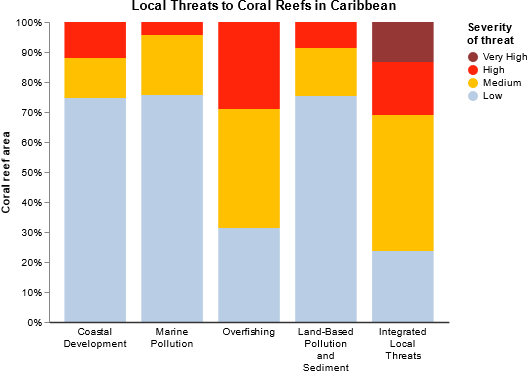

In [7]:
spec=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Fraction of coral reef area under various magnitudes of local threat, separated by type of threat ",
  "width": 300,
  "height": 250,
  "padding": {
    "left": 0, 
    "top": 0, 
    "right": 0, 
    "bottom": 5
  },
  "autosize": {"type": "pad", "resize": true, "contains": "padding"},
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {"events": "@cell:mouseover", "update": "datum"},
        {"events": "@cell:mouseout", "update": "null"}
      ]
    },
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "bind": {
        "input": "select",
        "options": [
          "Australia",
          "Brazil",
          "Caribbean",
          "East Asia",
          "ETP",
          "Pacific",
          "PERSGA",
          "ROPME",
          "South Asia",
          "WIO"
        ],
        "name": "GCRMN Region "
      },
      "value": "Caribbean"
    },
    {
      "name": "url_param",
      "description": "Unchanging URL for pulling data",
      "update": "'https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_calcs_007_local_threats'"
    }
  ],
  "data": [
    {
      "name": "table",
      "url": {
        "signal": "url_param"
      },
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {
          "type": "filter", 
          "expr": "datum.gcrmn_reg == region_name"
        },
        {
          "type": "formula",
          "expr": "datum.area_low/datum.area_total",
          "as": "fraction_low"
        },
        {
          "type": "formula",
          "expr": "datum.area_medium/datum.area_total",
          "as": "fraction_medium"
        },
        {
          "type": "formula",
          "expr": "datum.area_high/datum.area_total",
          "as": "fraction_high"
        },
        {
          "type": "formula",
          "expr": "datum.area_veryhigh/datum.area_total",
          "as": "fraction_veryhigh"
        },
        {
          "type": "formula",
          "expr": "datum.fraction_low+datum.fraction_medium",
          "as": "sum_low-medium"
        },
        {
          "type": "formula",
          "expr": "datum.fraction_low+datum.fraction_medium+datum.fraction_high",
          "as": "sum_low-medium-high"
        }
      ]
    }
  ],
  "title": {
    "text": 
      {"signal": "'Local Threats to Coral Reefs in '+region_name"}
  },
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "threat"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": [0,1],
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": [
        "Very High",
        "High",
        "Medium",
        "Low"
      ],
      "range": [
        "#953735",
        "#FF250B",
        "#FFC000",
        "#B9CDE5"
      ]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Coral reef area",
      "format": "%"
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "tickSize": 0,
      "labelPadding": 4,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {"signal": "datum.value"},
            "fill": {"value": "black"},
            "angle": {"value": 0},
            "fontSize": {"value": 10},
            "align": {"value": "center"},
            "baseline": {"value": "middle"},
            "dy": {"value": 5},
            "dx": {"value": 0},
            "lineBreak": {"value": " "}
          },
          "hover": {"fill": {"value": "firebrick"}}
        },
        "domain": {
          "update": {"stroke": {"value": "#333"}, "strokeWidth": {"value": 1.5}}
        }
      }
    }
  ],
  "marks": [
    {
      "name": "bars_low",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "threat"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "value": 0},
          "y2": {"scale": "yscale", "field": "fraction_low"},
          "fill": {"scale": "color", "value": "Low"},
          "tooltip": {
            "signal": "{title:datum.threat, 'Severity of Threat':'Low', 'Fraction of regional reef area':format(datum.fraction_low,'.1%')}"
          }
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    },
    {
      "name": "bars_medium",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "threat"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "fraction_low"},
          "y2": {"scale": "yscale", "field": "sum_low-medium"},
          "fill": {"scale": "color", "value": "Medium"},
          "tooltip": {
            "signal": "{title:datum.threat, 'Severity of Threat':'Medium', 'Fraction of regional reef area':format(datum.fraction_medium,'.1%')}"
          }
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    },
    {
      "name": "bars_high",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "threat"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "sum_low-medium"},
          "y2": {"scale": "yscale", "field": "sum_low-medium-high"},
          "fill": {"scale": "color", "value": "High"},
          "tooltip": {
            "signal": "{title:datum.threat, 'Severity of Threat':'High', 'Fraction of regional reef area':format(datum.fraction_high,'.1%')}"
          }
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    },
    {
      "name": "bars_veryhigh",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "threat"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "sum_low-medium-high"},
          "y2": {"scale": "yscale", "value": 1.0},
          "fill": {"scale": "color", "value": "Very High"},
          "tooltip": {
            "signal": "{title:datum.threat, 'Severity of Threat':'Very High', 'Fraction of regional reef area':format(datum.fraction_veryhigh,'.1%')}"
          }
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    }
  ],
  "legends": [
    {
      "title": [
        "Severity",
        "of threat"
      ],
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)